<a href="https://colab.research.google.com/github/KeoJ/CIND820/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt


In [56]:
# filtering the data
# train_set = 2017-01-01 to 2019-12-31
# test_set = 2020-01-01 to 2020-02-19
btc_total = pd.read_csv('btc_total.csv')
train_set = btc_total.iloc[998:2093, 5:6].values
test_set = btc_total.iloc[2093:2143, 5:6].values

# scaling the data
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

# creating a data structure with 60 time-steps and 1 output
x_train = []
y_train = []
for i in range(60, 1095):
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [57]:
model = Sequential()

# adding LSTM layers and dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# adding output layer
model.add(Dense(units = 1))

# compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training set
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 11s 115ms/step - loss: 0.0402
Epoch 2/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0071
Epoch 3/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0068
Epoch 4/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0055
Epoch 5/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0045
Epoch 6/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0041
Epoch 7/100
33/33 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 8/100
33/33 [==============================] - 4s 114ms/step - loss: 0.0032
Epoch 9/100
33/33 [==============================] - 4s 116ms/step - loss: 0.0051
Epoch 10/100
33/33 [==============================] - 4s 115ms/step - loss: 0.0034
Epoch 11/100
33/33 [==============================] - 4s 116ms/step - loss: 0.0033
Epoch 12/100
33/33 [==============================] - 4s 116ms/step - loss: 0.0034
Epoch 13/100

In [58]:
# predicting test data
dataset_train = btc_total.iloc[998:2093, 5:6]
dataset_test = btc_total.iloc[2093:2143, 5:6]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 110):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
# predicting price
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

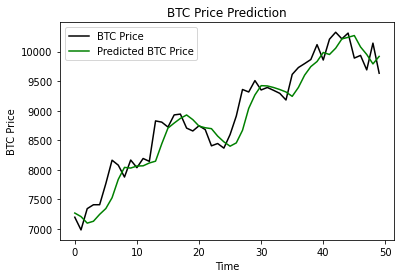

In [67]:
# visualising the results
plt.plot(test_set, color = 'black', label = 'BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [69]:
# MSE & RMSE calcualtion
mse = (mean_squared_error(test_set, predicted_price))
print('MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(test_set, predicted_price))
print('RMSE: %.3f' % rmse)

MSE: 72202.896
RMSE: 268.706
